In [1]:
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
from tqdm import tqdm

sectors = [44,45,46]

pdcsaps = []
saps = []

for sector in tqdm(sectors):
    sc = cr.ShortCadence(name='k2-274', sector=sector)
    saps.append(sc.lc_sap)
    pdcsaps.append(sc.lc_pdcsap)

  0%|          | 0/3 [00:00<?, ?it/s]

Target: K2-274
Available sectors: [44 45 46]
Using sector=44.
Searching lightcurvefile for <SkyCoord (ICRS): (ra, dec) in deg
    (129.28244167, 20.39936361)> (sector 44).
Found 1 lightcurve(s).


 33%|███▎      | 1/3 [00:26<00:52, 26.15s/it]

Using K2 short cadence.

Target: K2-274
Available sectors: [44 45 46]
Using sector=45.
Searching lightcurvefile for <SkyCoord (ICRS): (ra, dec) in deg
    (129.28244167, 20.39936361)> (sector 45).
Found 1 lightcurve(s).


 67%|██████▋   | 2/3 [00:34<00:15, 15.87s/it]

Using K2 short cadence.

Target: K2-274
Available sectors: [44 45 46]
Using sector=46.
Searching lightcurvefile for <SkyCoord (ICRS): (ra, dec) in deg
    (129.28244167, 20.39936361)> (sector 46).
Found 1 lightcurve(s).


100%|██████████| 3/3 [00:55<00:00, 18.55s/it]

Using K2 short cadence.



In [3]:
p,t0,tdur = 14.1330314, 2457145.111261, 3.6

## lightcurves

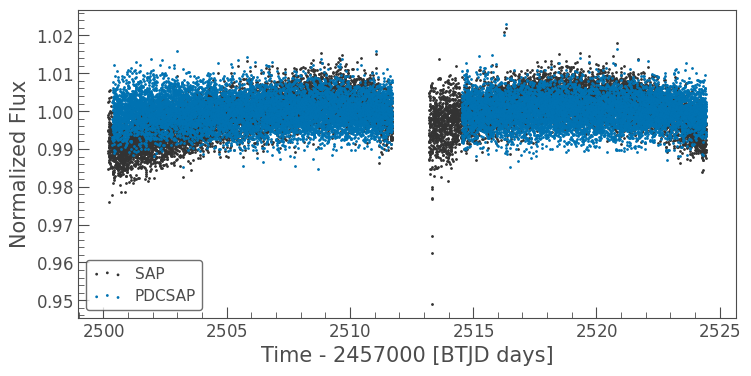

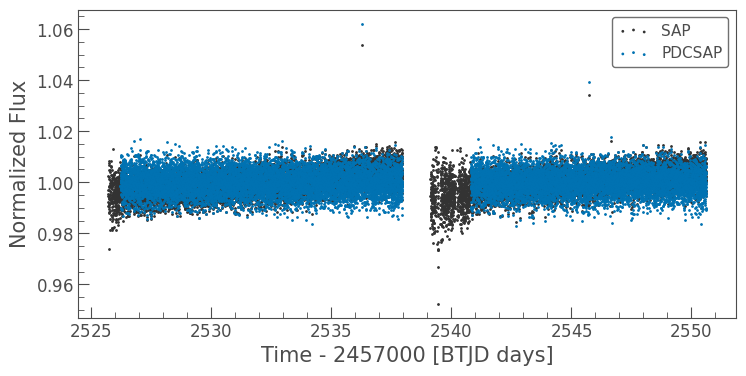

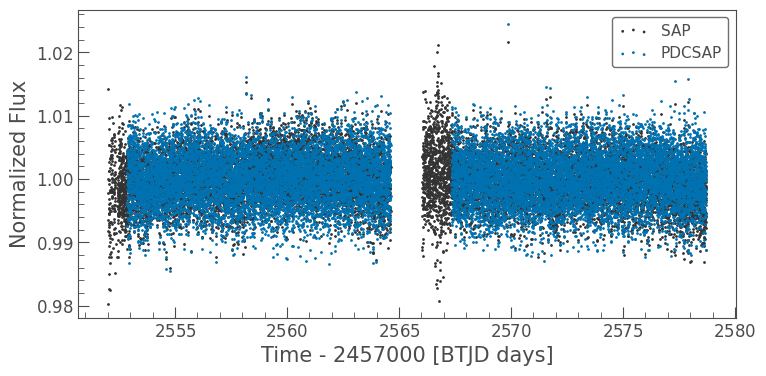

In [17]:
for lc1,lc2 in zip(saps,pdcsaps):
    ax = lc1.normalize().scatter(label='SAP')
    _ = lc2.normalize().scatter(label='PDCSAP', ax=ax)

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

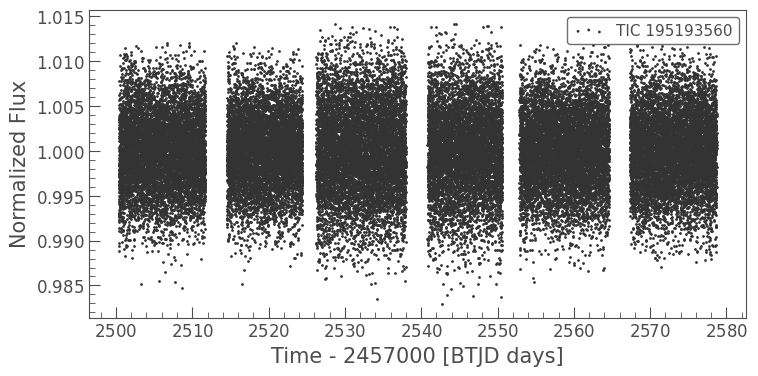

In [24]:
pdcsap = pdcsaps[0].normalize().remove_outliers(sigma_upper=3, sigma_lower=10).append(
    pdcsaps[1].normalize().remove_outliers(sigma_upper=3, sigma_lower=10)).append(
    pdcsaps[2].normalize().remove_outliers(sigma_upper=3, sigma_lower=10))
pdcsap.scatter()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

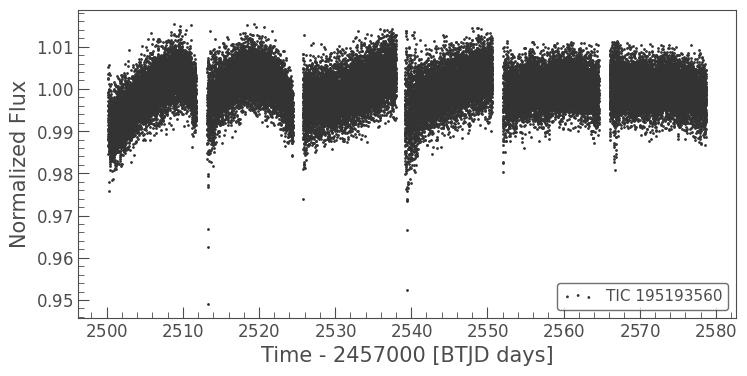

In [28]:
sap = saps[0].normalize().remove_outliers(sigma_upper=3, sigma_lower=10).append(
    saps[1].normalize().remove_outliers(sigma_upper=3, sigma_lower=10)).append(
    saps[2].normalize().remove_outliers(sigma_upper=3, sigma_lower=10))
sap.scatter()

## Flatten SAP

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

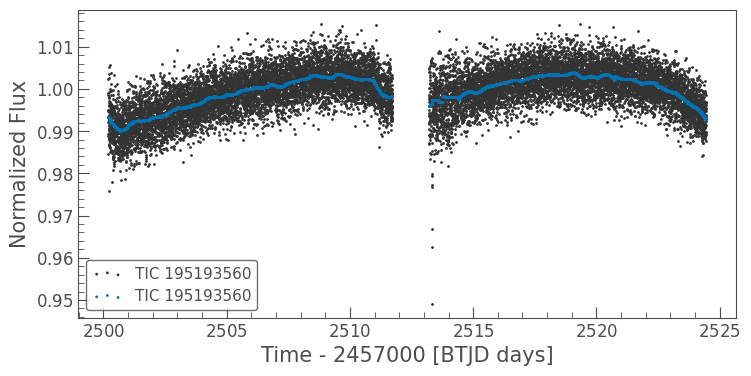

In [37]:
s1 = saps[0].normalize().remove_outliers(sigma_upper=3, sigma_lower=10)
ax = s1.scatter()
flat,trend = s1.flatten(return_trend=True, window_length=501)
trend.scatter(ax=ax)

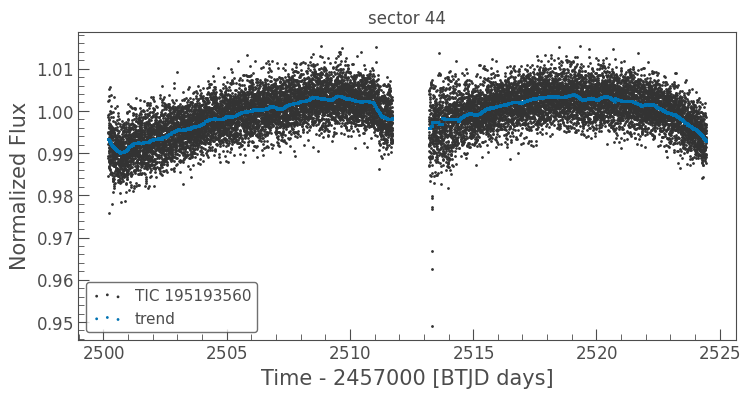

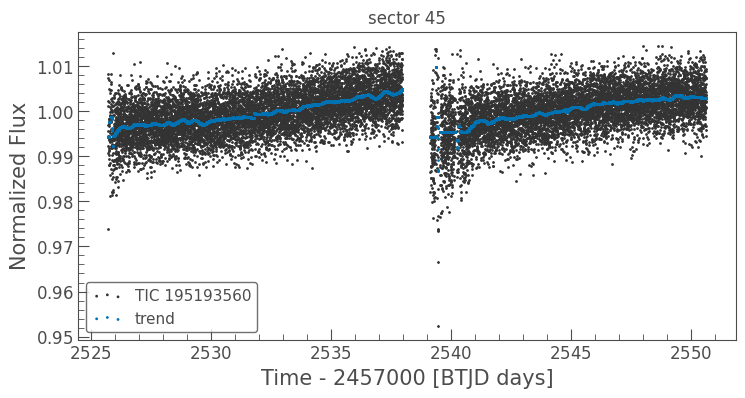

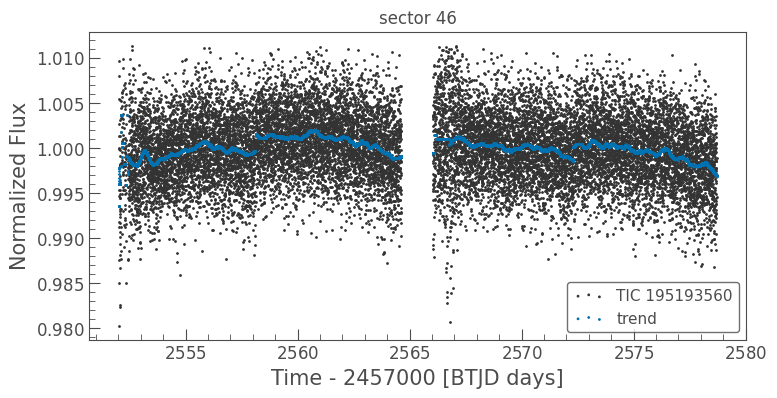

In [39]:
for s in saps:
    s = s.normalize().remove_outliers(sigma_upper=3, sigma_lower=10)
    ax = s.scatter()
    flat,trend = s.flatten(return_trend=True, window_length=501)
    trend.scatter(ax=ax, label='trend')
    ax.set_title(f"sector {s.sector}")

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

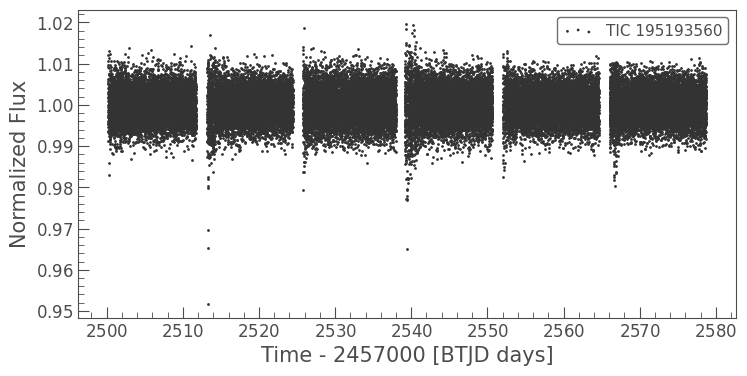

In [40]:
sap = saps[0].normalize().remove_outliers(sigma_upper=3, sigma_lower=10).flatten(window_length=501).append(
    saps[1].normalize().remove_outliers(sigma_upper=3, sigma_lower=10).flatten(window_length=501)).append(
    saps[2].normalize().remove_outliers(sigma_upper=3, sigma_lower=10).flatten(window_length=501))
sap.scatter()

## run TLS

### PDCSAP

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 36 durations
Searching 47324 data points, 8301 periods from 0.602 to 39.169 days
Using all 8 CPU threads


100%|██████████| 8301/8301 periods | 06:03<00:00


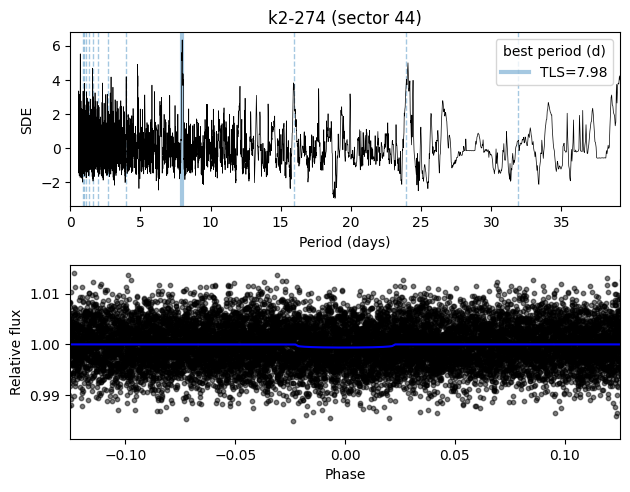

In [29]:
fig = sc.run_tls(pdcsap)

### SAP

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 36 durations
Searching 50999 data points, 8320 periods from 0.602 to 39.252 days
Using all 8 CPU threads


100%|██████████| 8320/8320 periods | 07:10<00:00


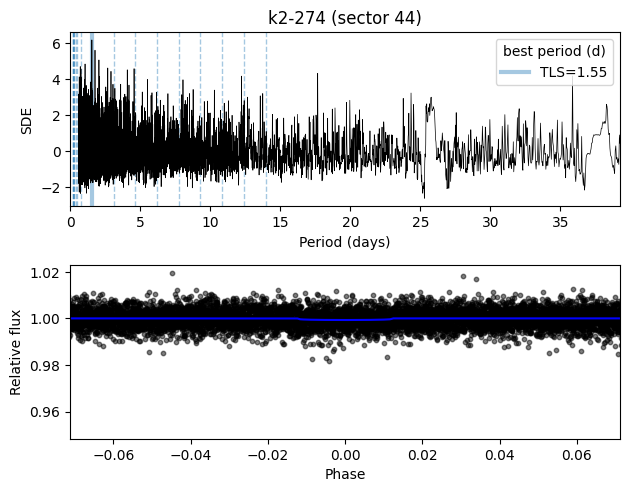

In [41]:
fig = sc.run_tls(sap)